In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
class NeuronPopRecording: #Suppose to be one file
    metadata_datanames=['noNeurons', 'dt', 'totalTimesteps', 'neuronPopId', 'simTime']
    def __init__(self, neuronPop_id : int):
        self.neuronPop_id=neuronPop_id
    def append_metadata(self, metadata_list : list):
        self.metadata=metadata_list
    def append_spiketimes(self, N_index : int, spiketimes_list : list):
        setattr(self, "Neuron_%s" % (N_index), spiketimes_list)
    def create_firing_matrix(self):
        self.F_matrix=np.zeros(shape=(self.metadata[2], self.metadata[0]))
        for neuron in dir(self):
            if neuron.startswith("Neuron"):
                neuron_index=int(neuron.split('_')[1])
                spiketimes=self.__dict__[neuron]
                for st in spiketimes:
                    self.F_matrix[int(st/self.metadata[1])-1, neuron_index]=1

class OutputRecordingList: #Compendium of all recordings
#    def __iter__(self):
#        for attr, value in self.__dict__.iteritems():
#            yield attr, value
    def get(self):
        return self.__dict__
    def append(self, var : NeuronPopRecording):
        setattr(self, "NeuronPop_%s" % (var.neuronPop_id), var)

#Here we use split = to get the name and the values, then split the second with commas to get the spike-time list
def read_reasterplot_file_into_object(neuronPop_files):
    all_recordingsST=OutputRecordingList()
    for i, file in enumerate(neuronPop_files):
        with open(file, "r") as file:
            lines=file.readlines()
            for line in lines:
                if line.startswith('M'):
                    subline=line.split('=')
                    neuronpop_id=int(subline[0].split('_')[1])
                    metadata_list=subline[1].split(',')

                    metadata_list[0]=int(metadata_list[0])
                    metadata_list[1]=float(metadata_list[1])
                    metadata_list[2]=int(metadata_list[2])
                    metadata_list[3]=int(metadata_list[3])
                    metadata_list[4]=float(metadata_list[4])

                    recording=NeuronPopRecording(neuronpop_id)
                    recording.append_metadata(metadata_list)
                    all_recordingsST.append(recording)

                elif line.startswith('N'):
                    subline=line.split('=')
                    idline=subline[0].split('_')
                    neuronpop_id=int(idline[1])
                    neuron_id=int(idline[2])

                    spiketimes=list()
                    for i in subline[1].split(','):
                        if i=='':
                            continue
                        elif i=='\n':
                            continue
                        else:
                            spiketimes.append(float(i))
                    all_recordingsST.__getattribute__(list(all_recordingsST.__dict__.keys())[neuronpop_id]).__getattribute__("append_spiketimes").__call__(neuron_id, spiketimes)
                else:
                    print('Oversight error')
                    raise Exception
        all_recordingsST.append(recording)
    return all_recordingsST

### File reading

In [6]:
#File reading here (files are always iterated on alphabetical order)
parsedOutput_string='_ParsedSpikeTimes.dat'

base_dir = os.getcwd()

neuronPop_files = [f for f in os.listdir(base_dir) if f.endswith(parsedOutput_string)]

### Reading parsed spike times file (Neuron output)
Always remember: the non-parsed files cannot be deleted by the programme. If they are very big it is recommended to delete them manually
It is also of notice that the recorded spike-times are shifted by 1 dt.

In [7]:
all_recordings=read_reasterplot_file_into_object(neuronPop_files)
for attr in all_recordings.__dict__:
    print(attr)
    all_recordings.__getattribute__(attr).__getattribute__("create_firing_matrix").__call__()
    ##Up until here everything woks as expected

NeuronPop_0
NeuronPop_1


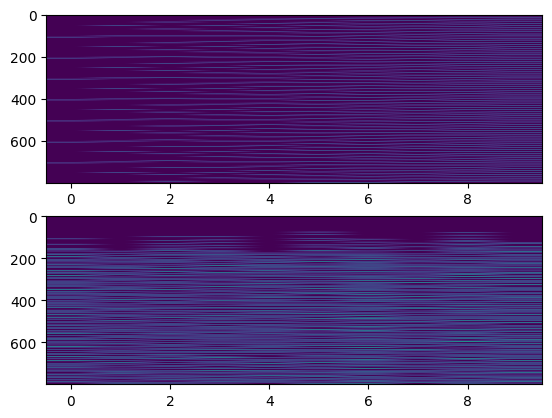

In [12]:
N=0
plt.subplot(211)
plt.imshow(all_recordings.NeuronPop_0.F_matrix[0:800,:], aspect='auto')
plt.subplot(212)
plt.imshow(all_recordings.NeuronPop_1.F_matrix[N:N+800,:], aspect='auto')
plt.show()


If the plot coincides with the image, the DictatNeuronPop and RasterPlot parsing work properly

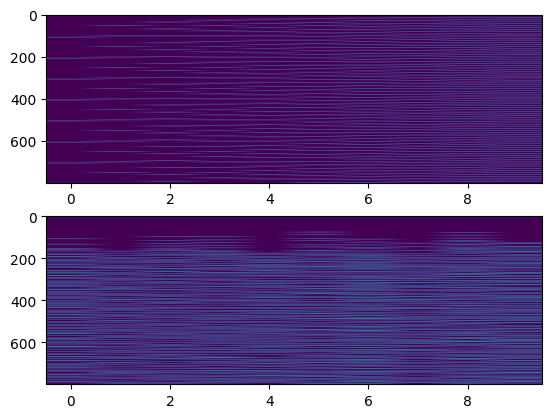